# EX01

In [140]:
import pandas as pd
import matplotlib.pyplot as plt

Leitura do arquivo "students.csv" utilizando a biblioteca panda e armazenado no dataframe "df_students"

In [141]:
df_students = pd.read_csv("students.csv",index_col="index")
df_students[:5]

,cursus,first_name,last_name,birthday,best_hand,linear_algebra,physics,biology,cybersecurity,statistics,sociology,computer_networks,history,project_management,chemistry,environmental_science,communication_skills,arts
index,,,,,,,,,,,,,,,,,,
0,Data Science,Tamara,Hsu,2000-03-30,Left,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,Business,Erich,Paredes,1999-10-14,Right,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,Data Science,Stephany,Braun,1999-11-03,Left,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,Computer Science,Vesta,Mcmichael,2000-08-19,Left,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,Computer Science,Gaston,Gibbs,1998-09-27,Left,60158.0,436.775204,-7.820623,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98


Vizualizando em forma de tabela uma descrição das estatisticas de cada coluna quantitativa

In [142]:

df_students.describe()

,linear_algebra,physics,biology,cybersecurity,statistics,sociology,computer_networks,history,project_management,chemistry,environmental_science,communication_skills,arts
count,1566.000000,1568.000000,1567.000000,1569.000000,1561.000000,1565.000000,1565.000000,1557.000000,1566.000000,1570.000000,1560.000000,1600.000000,1600.000000
mean,49634.570243,39.797131,1.141020,-0.387863,3.153910,-224.589915,495.747970,2.963095,1030.096946,5.950373,-0.053427,-243.374409,21.958012
std,16679.806036,520.298268,5.219682,5.212794,4.155301,486.344840,106.285165,4.425775,44.125116,3.147854,0.971457,8.783640,97.631602
min,-24370.000000,-966.740546,-10.295663,-10.162119,-8.727000,-1086.496835,283.869609,-8.858993,906.627320,-4.697484,-3.313676,-261.048920,-181.470000
25%,38511.500000,-489.551387,-4.308182,-5.259095,3.099000,-577.580096,397.511047,2.218653,1026.209993,3.646785,-0.671606,-250.652600,-41.870000
50%,49013.500000,260.289446,3.469012,-2.589342,4.624000,-419.164294,463.918305,4.378176,1045.506996,5.874837,-0.044811,-244.867765,-2.515000
75%,60811.250000,524.771949,5.419183,4.904680,5.667000,254.994857,597.492230,5.825242,1058.436410,8.248173,0.589919,-232.552305,50.560000
max,104956.000000,1016.211940,11.612895,9.667405,10.032000,1092.388611,745.396220,11.889713,1098.958201,13.536762,3.056546,-225.428140,279.070000


Agrupando os estudantes por curso e armazenando no dataframe "df_students_by_course" para plotar a distribuição de alunos por curso

In [143]:
df_students_by_course = pd.DataFrame(df_students.groupby(['cursus']).size())
df_students_by_course.reset_index(inplace=True)
df_students_by_course.columns = ['cursus','count']

In [144]:
total_alunos = sum(df_students_by_course['count'])
df_students_by_course['percent'] = df_students_by_course['count']/total_alunos

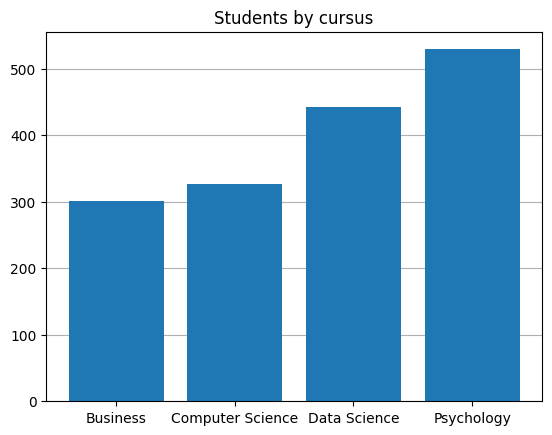

In [145]:

plt.grid(axis = 'y', zorder=-1)
plt.bar(df_students_by_course['cursus'],df_students_by_course['count'],zorder=2)
plt.title("Students by cursus")
plt.show()

Como podemos observar o curso de Psychology possui o maior numero de estudantes.

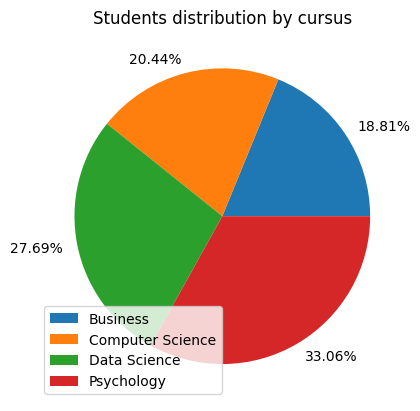

In [146]:
plt.pie(df_students_by_course['count'], labels = ['{:0.2f}%'.format(valor*100) for valor in df_students_by_course['percent']] )
plt.legend(df_students_by_course['cursus'], loc='lower left')
plt.title('Students distribution by cursus')
plt.show() 

Representação da distribuição de alunos por curso em grafico de pizza.

# EX02

Selecionando tres materias para analisar a distribuição de notas

In [147]:
df_materias = df_students[['physics','biology','cybersecurity']]


In [148]:
df_materias

,physics,biology,cybersecurity
index,,,
0,-487.886086,5.727180,4.878861
1,-552.060507,-5.987446,5.520605
2,-366.076117,7.725017,3.660761
3,697.742809,-6.497214,-6.977428
4,436.775204,-7.820623,NaN
...,...,...,...
1595,354.280086,-4.541837,-3.542801
1596,367.531174,6.061064,-3.675312
1597,544.018925,-3.203269,-5.440189


Como as notas não estão normalizadas , não conseguimos fazer uma analise precisa.

<Axes: ylabel='Density'>

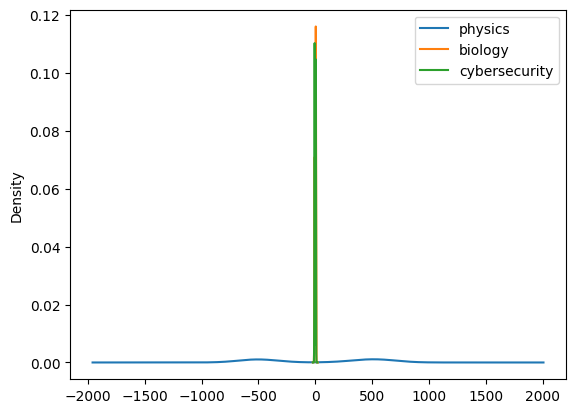

In [149]:
df_materias.plot(kind='kde')

Normalizando colunas de notas de todas as materias para o calculo da media

In [150]:
def normalize(column):
    min = column.min()
    max = column.max()
    return (column - min)/(max-min)

In [151]:
materias = ['linear_algebra','physics','biology','cybersecurity','statistics','sociology','computer_networks','history','project_management','chemistry','environmental_science','communication_skills','arts']

In [152]:

df_notas = df_students[materias]

In [153]:
df_notas = df_notas.apply(normalize)
df_notas

,linear_algebra,physics,biology,cybersecurity,statistics,sociology,computer_networks,history,project_management,chemistry,environmental_science,communication_skills,arts
index,,,,,,,,,,,,,
0,0.639887,0.241486,0.731351,0.758514,0.716936,0.623499,0.538679,0.679081,0.692354,0.465490,0.632571,0.793213,0.335649
1,0.708357,0.209123,0.196645,0.790877,0.166054,0.274983,0.181768,0.624914,0.791954,0.655153,0.534573,0.248862,0.147696
2,0.371712,0.302914,0.822541,0.697086,0.792526,0.803801,0.690568,0.598330,0.943484,0.736308,0.439286,0.946253,0.460090
3,0.441033,0.839396,0.173377,0.160604,0.679834,0.252191,0.520257,0.195162,0.071565,0.302694,0.517978,0.117970,0.829700
4,0.653604,0.707791,0.112971,NaN,0.584413,0.294754,0.683503,0.260962,0.160179,0.494046,0.478728,0.130868,0.737070
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.567396,0.666189,0.262629,0.333811,0.769177,0.270442,0.724445,0.174819,0.299445,0.443483,0.418148,0.299121,0.797542
1596,0.677868,0.672871,0.746591,0.327129,0.558878,0.203419,0.350918,0.534834,0.777411,0.577087,0.467757,0.410483,0.491315
1597,0.682577,0.761874,0.323727,0.238126,0.788528,0.321883,0.761260,0.138550,0.245615,0.351388,0.531417,0.264231,0.824988


Calculo da media de notas de cada aluno para todos os cursos (Após a normalização)

In [154]:
df_notas['mean'] = df_notas.mean(axis=1)
df_notas

,linear_algebra,physics,biology,cybersecurity,statistics,sociology,computer_networks,history,project_management,chemistry,environmental_science,communication_skills,arts,mean
index,,,,,,,,,,,,,,
0,0.639887,0.241486,0.731351,0.758514,0.716936,0.623499,0.538679,0.679081,0.692354,0.465490,0.632571,0.793213,0.335649,0.603747
1,0.708357,0.209123,0.196645,0.790877,0.166054,0.274983,0.181768,0.624914,0.791954,0.655153,0.534573,0.248862,0.147696,0.425459
2,0.371712,0.302914,0.822541,0.697086,0.792526,0.803801,0.690568,0.598330,0.943484,0.736308,0.439286,0.946253,0.460090,0.661915
3,0.441033,0.839396,0.173377,0.160604,0.679834,0.252191,0.520257,0.195162,0.071565,0.302694,0.517978,0.117970,0.829700,0.392443
4,0.653604,0.707791,0.112971,NaN,0.584413,0.294754,0.683503,0.260962,0.160179,0.494046,0.478728,0.130868,0.737070,0.441574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.567396,0.666189,0.262629,0.333811,0.769177,0.270442,0.724445,0.174819,0.299445,0.443483,0.418148,0.299121,0.797542,0.463588
1596,0.677868,0.672871,0.746591,0.327129,0.558878,0.203419,0.350918,0.534834,0.777411,0.577087,0.467757,0.410483,0.491315,0.522812
1597,0.682577,0.761874,0.323727,0.238126,0.788528,0.321883,0.761260,0.138550,0.245615,0.351388,0.531417,0.264231,0.824988,0.479551


Adicionando a coluna de média no dataframe original e substitui com as colunas normalizadas

In [155]:
df_students['mean'] = df_notas['mean']
df_students[materias] = df_notas[materias]

Obtendo as 10 maiores medias

In [156]:
df_students.sort_values("mean", ascending=False, inplace=True)
df_students[['first_name','last_name','mean']].head(10)

,first_name,last_name,mean
index,,,
1298,Tiffany,Wagoner,0.715167
827,Karrie,Eddy,0.709863
249,Sanford,Garrett,0.706799
255,Geraldo,Seaton,0.703116
994,Wade,Rau,0.700896
61,Patti,Montano,0.699628
310,Jimmie,Brantley,0.696643
1040,Rachael,Bullard,0.694881
1152,Chasity,Slack,0.693229


Obtendo as 10 piores medias

In [157]:
df_students.sort_values("mean", ascending=True, inplace=True)
df_students[['first_name','last_name','mean']].head(10)

,first_name,last_name,mean
index,,,
117,Sheri,Tuttle,0.347692
755,Kimberley,Sharpe,0.352975
1573,Ezekiel,Vallejo,0.363867
211,Charmaine,Renfro,0.369173
578,Gus,Wise,0.378331
168,Ervin,Shelley,0.379304
201,Marty,Canady,0.380087
295,Alvina,Gragg,0.381625
497,Nathan,Matson,0.382289


# EX03

Grafico com a distribuição de medias dos alunos para cada curso

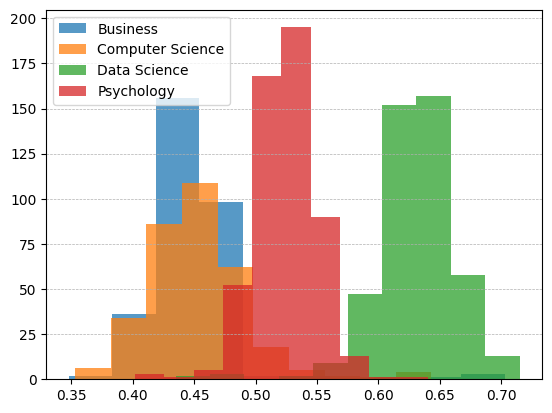

In [158]:
df_students.groupby('cursus')['mean'].hist(alpha=0.75, grid=False, legend=True )
plt.legend(loc='upper left')
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5 )
plt.show() 

Com base no grafico podemos concluir que o curso de 'Data Science' possui as melhores medias entre os cursos.

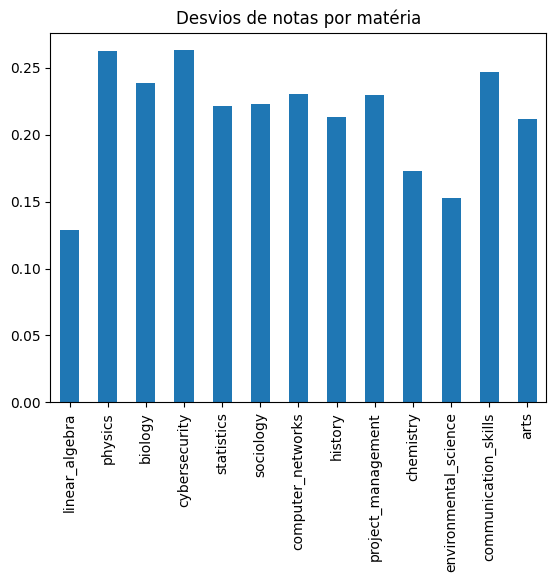

In [171]:
desvios = df_students[materias].std()
desvios.plot(kind='bar')
plt.title('Desvios de notas por matéria')
plt.show()

Criado o grafico com o desvio padrao de notas por materia, com base nele podemos concluir que 'linear_algebra' possui as notas mais homogeneas

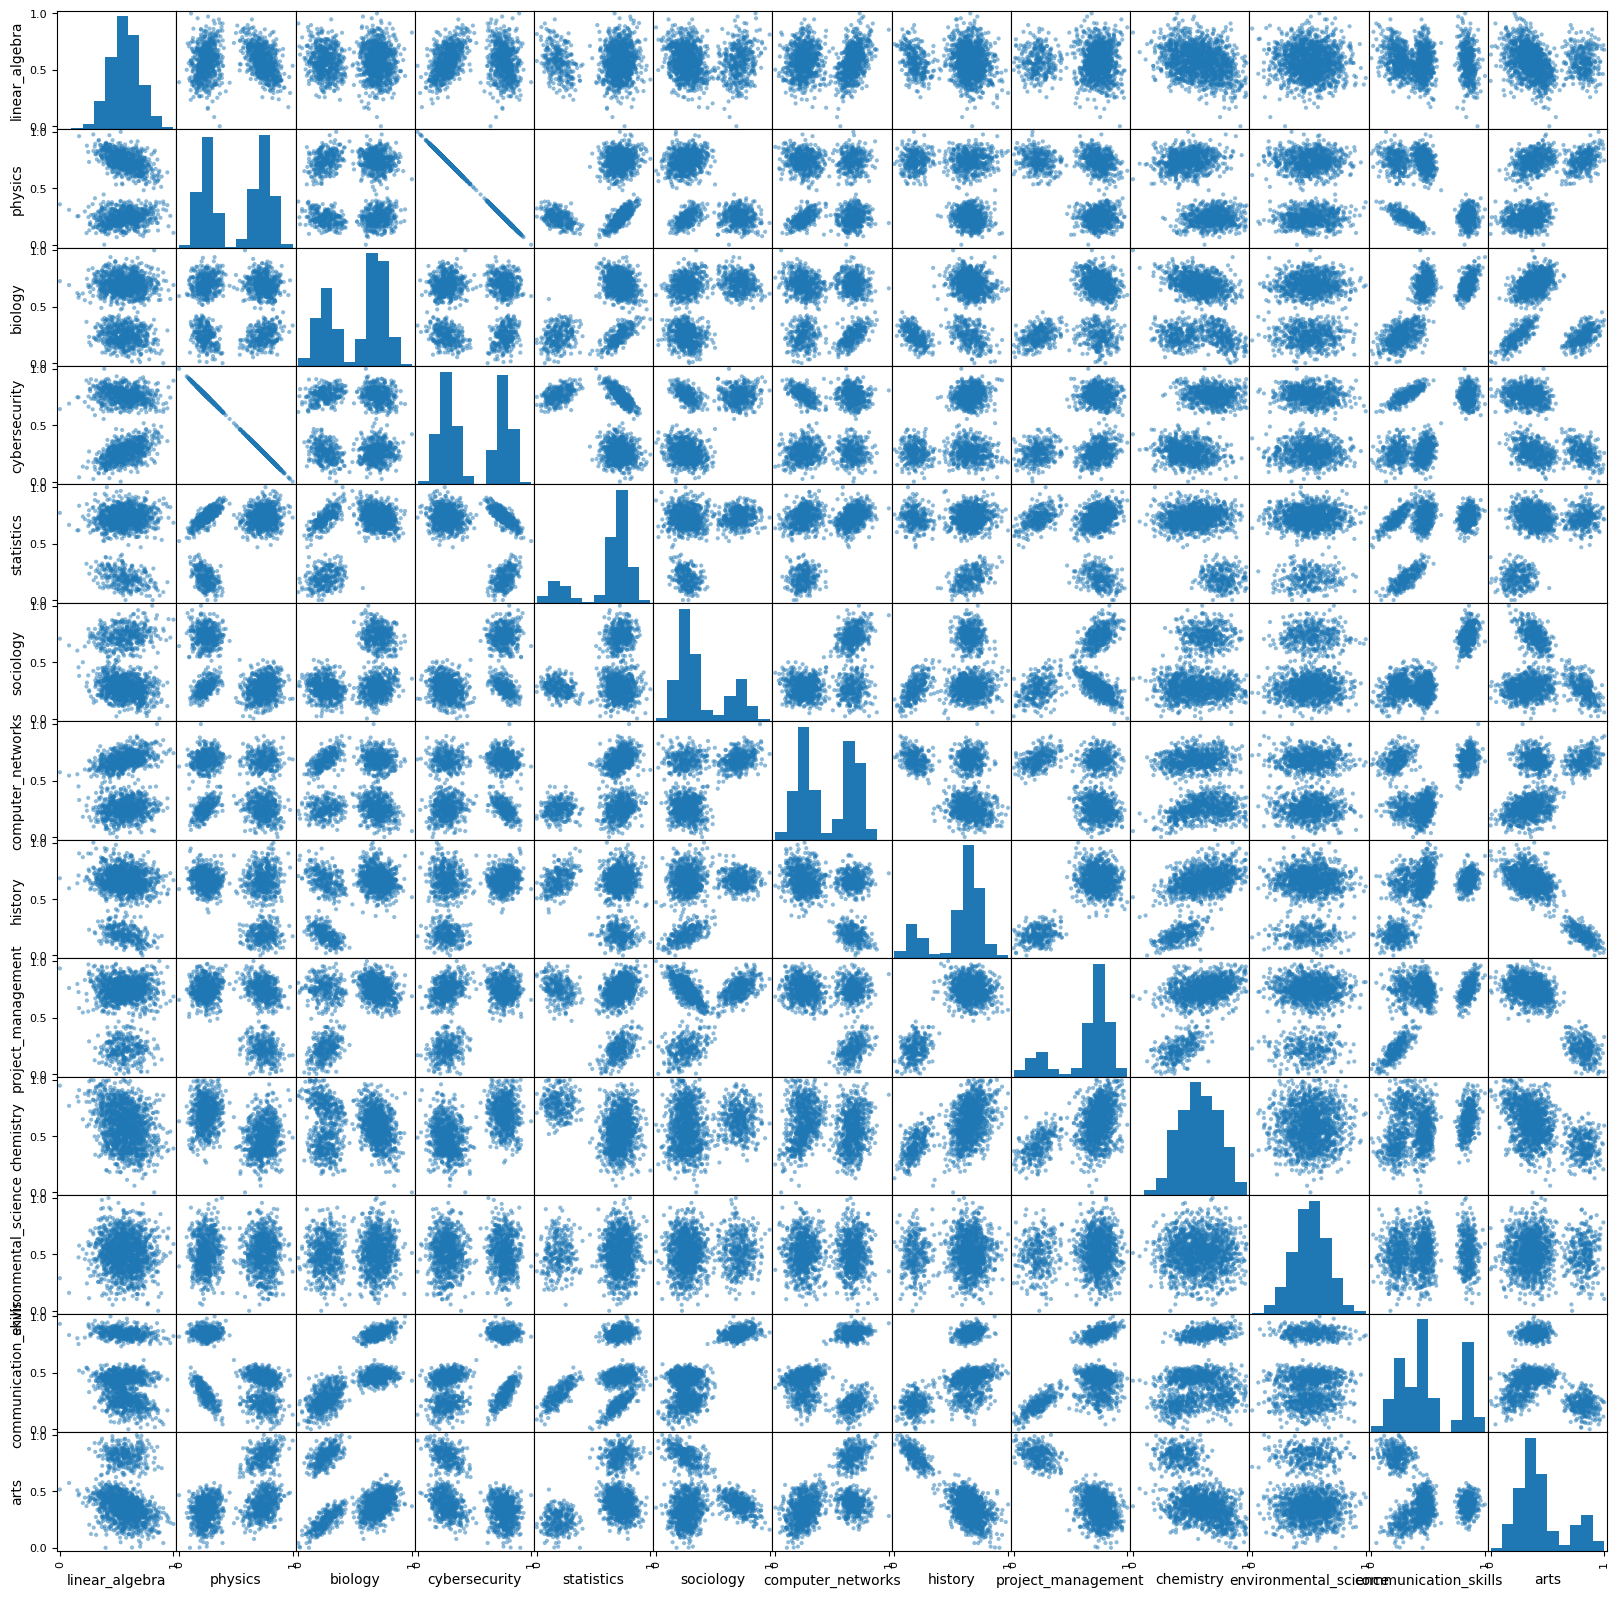

In [ ]:
pd.plotting.scatter_matrix(df_students[materias], grid=True, figsize=(20, 20))
plt.show()

In [175]:
correlation_matrix = df_students[materias].corr()
print(correlation_matrix)

                       linear_algebra   physics   biology  cybersecurity  \
linear_algebra               1.000000 -0.033355 -0.018613       0.037280   
physics                     -0.033355  1.000000  0.020210      -1.000000   
biology                     -0.018613  0.020210  1.000000      -0.023810   
cybersecurity                0.037280 -1.000000 -0.023810       1.000000   
statistics                  -0.003485  0.481663  0.549578      -0.479310   
sociology                   -0.055085 -0.578511  0.437113       0.576553   
computer_networks            0.076992 -0.192767 -0.042959       0.193138   
history                     -0.069778 -0.409449  0.510289       0.409559   
project_management          -0.004673 -0.440900  0.537615       0.442231   
chemistry                   -0.302859 -0.558429 -0.106415       0.556683   
environmental_science       -0.042129 -0.012876  0.047737       0.010865   
communication_skills        -0.100896 -0.521203  0.746614       0.521115   
arts        

O grafico acima representa a matriz scatter plot das notas por materia, onde podemos identificar que o curso de 'cybersecurity' e 'physics' possuem uma alta correlação negativa.

Os pares 'project_management' x 'arts'  e 'history' x 'arts'